In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cPickle as pickle

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import preprocessing

import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 1.5*matplotlib.rcParams['savefig.dpi']
from matplotlib import pyplot as plt

In [2]:
df_bikes = pickle.load(open('../output/df_bikes.pickle', 'r'))

In [3]:
# Normalize all the columns

scaler = preprocessing.StandardScaler(copy=True).fit(df_bikes)
#print pd.DataFrame({"Mean": scaler.mean_, "Std": scaler.std_}, index=df_bikes.columns)
df_bikes_scaled = scaler.transform(df_bikes)
#print pd.DataFrame({"Mean": df_bikes_scaled.mean(axis=0), "Std": df_bikes_scaled.std(axis=0)})

In [4]:
# Month Model

np.random.seed(42)
random_indices = np.random.permutation(len(df_bikes))
# range(2, 14) for JAN to DEC, range(14, 23) for CL1 to CL9
#X_random = df_bikes[range(2, 14)].values[random_indices]
#y_random = df_bikes.n_maints.values[random_indices]
X_random = df_bikes_scaled[:,2:14][random_indices,:]
y_random = df_bikes_scaled[:,0][random_indices]
X_train, X_test, y_train, y_test = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

lin_coef_month = LinearRegression().fit(X_random, y_random).coef_
print lin_coef_month

mses_month = [mean_squared_error(y_test, [y_test.mean()]*len(y_test))]
for estimator in [LinearRegression(), KNeighborsRegressor(n_neighbors=10), RandomForestRegressor(n_estimators=65)]:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses_month.append(mse)
print mses_month

[ 0.26182231  0.28567653  0.15404323  0.00584326 -0.00956242  0.05452571
  0.04174733  0.04275335  0.06297326  0.04421794  0.13698645  0.19842541]
[1.0840771192246388, 0.60621733835059211, 0.45202112346045409, 0.34171510388480258]


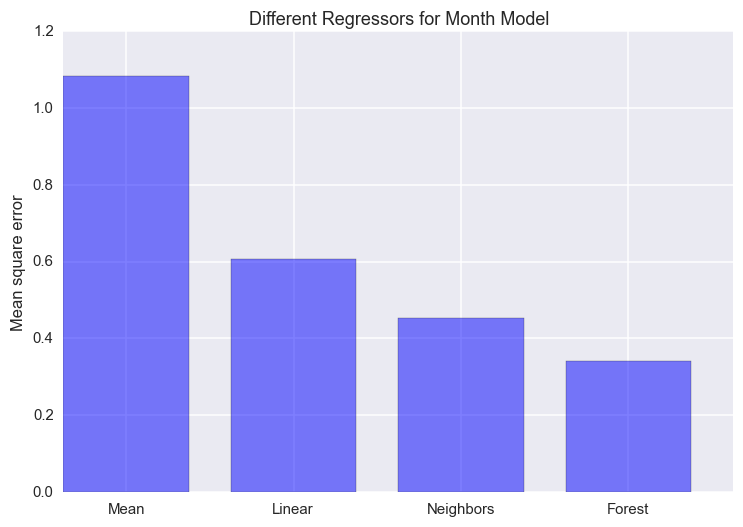

In [5]:
index = np.arange(4)
bar_width = 0.75
plt.bar(index, mses_month, bar_width, color='b', alpha=0.5)
plt.title('Different Regressors for Month Model')
plt.ylabel('Mean square error')
plt.xticks(index+bar_width/2, ('Mean', 'Linear', 'Neighbors', 'Forest'))
plt.show()

In [6]:
# Area Model

np.random.seed(42)
random_indices = np.random.permutation(len(df_bikes))
# range(2, 14) for JAN to DEC, range(14, 23) for CL1 to CL9
#X_random = df_bikes[range(14, 23)].values[random_indices]
#y_random = df_bikes.n_maints.values[random_indices]
X_random = df_bikes_scaled[:,14:23][random_indices,:]
y_random = df_bikes_scaled[:,0][random_indices]
X_train, X_test, y_train, y_test = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

lin_coef_area = LinearRegression().fit(X_random, y_random).coef_
print lin_coef_area

mses_area = [mean_squared_error(y_test, [y_test.mean()]*len(y_test))]
for estimator in [LinearRegression(), KNeighborsRegressor(n_neighbors=100), RandomForestRegressor(n_estimators=65)]:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses_area.append(mse)
print mses_area

[-0.14046567  0.04903937  0.09511729  0.10363787  0.12355114  0.04355239
  0.10532922  0.06213144  0.08810766]
[1.0840771192246388, 0.91413784106992269, 0.90581016137082693, 0.93286237194606492]


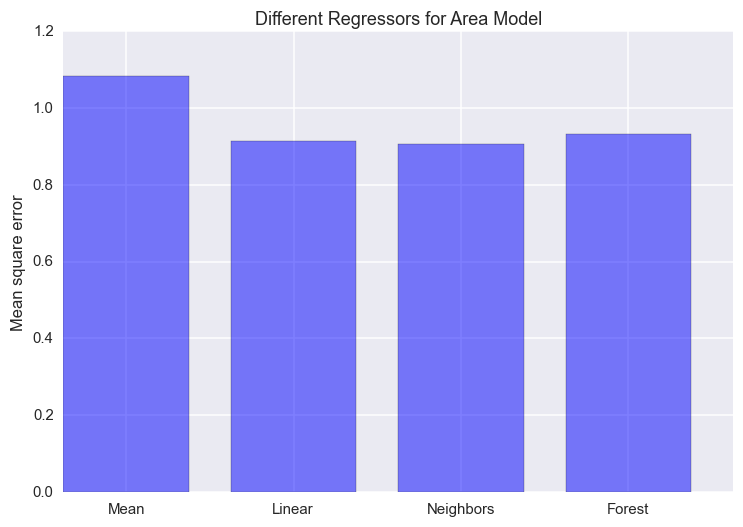

In [7]:
index = np.arange(4)
bar_width = 0.75
plt.bar(index, mses_area, bar_width, color='b', alpha=0.5)
plt.title('Different Regressors for Area Model')
plt.ylabel('Mean square error')
plt.xticks(index+bar_width/2, ('Mean', 'Linear', 'Neighbors', 'Forest'))
plt.show()

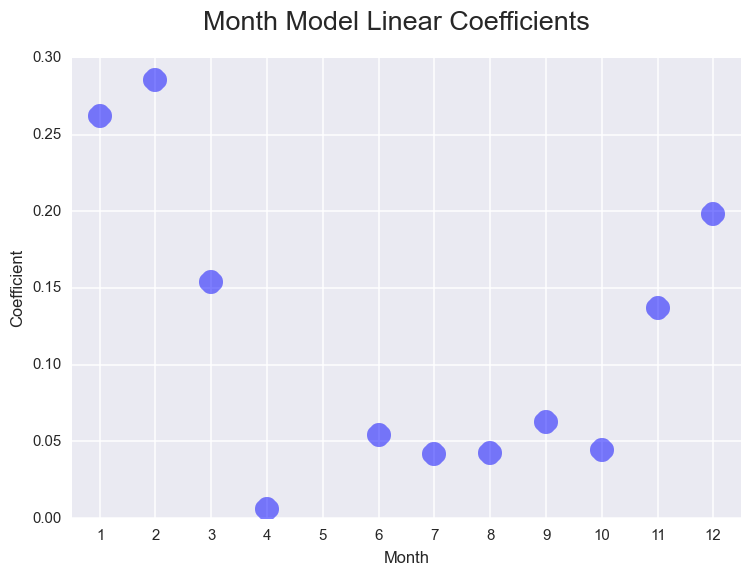

In [8]:
plt.suptitle('Month Model Linear Coefficients', fontsize=18)
plt.plot(lin_coef_month, 'bo', markersize=16, alpha=0.5)
plt.xticks(range(12), range(1, 13))
plt.xlabel('Month')
plt.ylabel('Coefficient')
plt.xlim(-0.5, 11.5)
plt.ylim(0.0, 0.3)
plt.show()

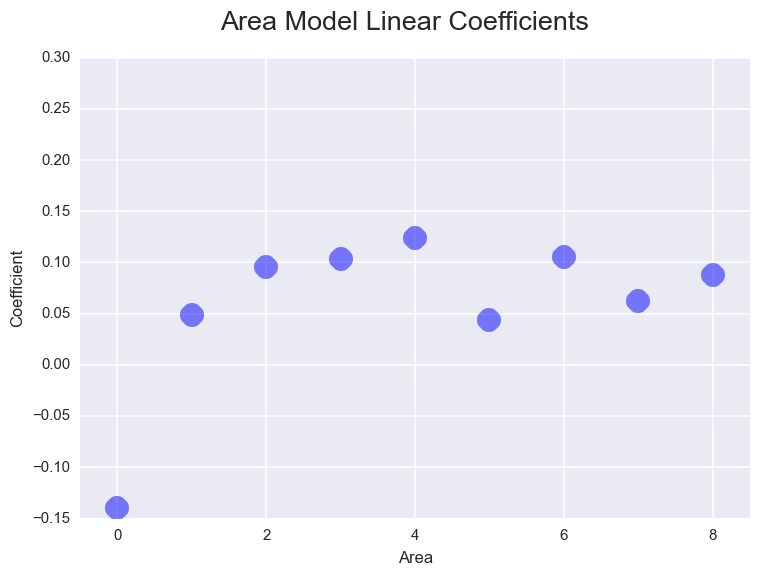

In [10]:
plt.suptitle('Area Model Linear Coefficients', fontsize=18)
plt.plot(lin_coef_area, 'bo', markersize=16, alpha=0.5)
plt.xticks(range(9), range(1, 10))
plt.xlabel('Area')
plt.ylabel('Coefficient')
plt.xlim(-0.5, 8.5)
plt.ylim(-0.15, 0.30)
plt.show()

In [ ]:
#parameters = {'n_estimators': range(30,100,7)}
#estimator = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
parameters = {'n_neighbors': range(2, 30, 1)}
estimator = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
estimator.fit(X_train, y_train)
print estimator.best_params_

In [ ]:
# range(2, 14) for JAN to DEC, range(14, 23) for CL1 to CL9
X_full = df_bikes[range(14, 23)].values
y_full = df_bikes.n_maints.values
#estimator = RandomForestRegressor(n_estimators=65)
estimator = KNeighborsRegressor(n_neighbors=100)
estimator.fit(X_full, y_full)
y_pred = estimator.predict(X_full)